<a href="https://colab.research.google.com/github/basiima/DSN-AI-Bootcamp-2024/blob/main/DSN_AI_Bootcamp_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
# 1. Load the datasets
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')
sample_submission = pd.read_csv('sample_submission.csv')
variable_definition = pd.read_csv('variable_definitions.csv')

In [13]:
# 2. Exploratory Data Analysis (EDA)
# Check for missing values
print(train_df.isnull().sum())

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


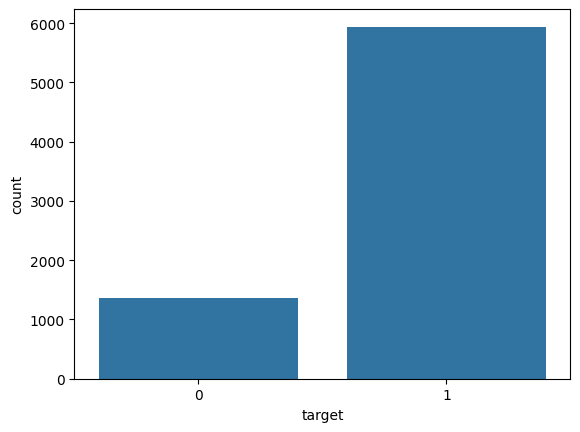

In [14]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=train_df)
plt.show()

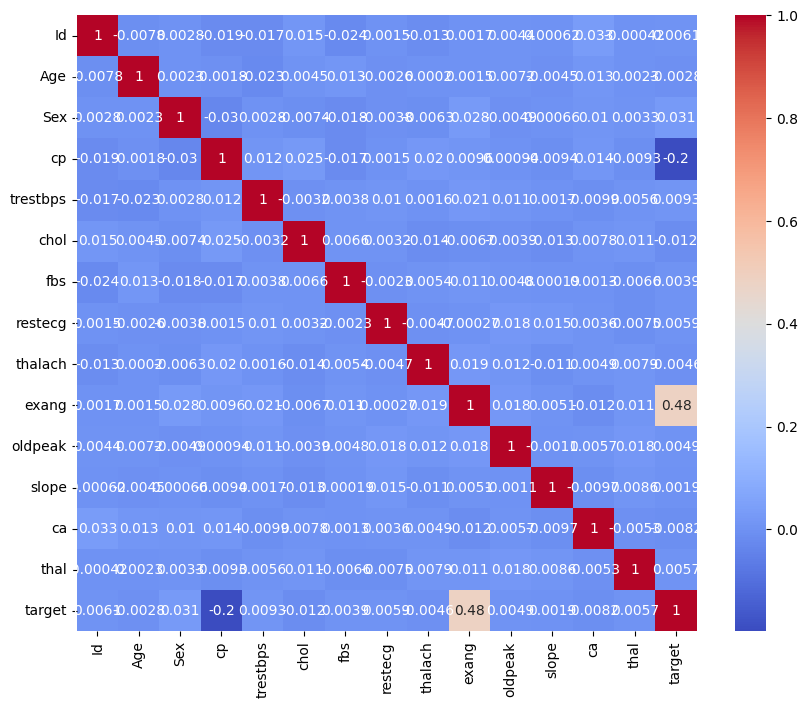

In [16]:
# Check correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
train_df.head(3)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1


In [18]:
# 3. Preprocessing
# Drop unnecessary columns (like IDs or duplicate columns)
train_df = train_df.drop(columns=['Id','trestbps','restecg'])  # Drop ID column if present
test_ids = test_df['id']  # Save test IDs for the final submission
test_df = test_df.drop(columns=['id'])

In [19]:
# Split features and target
X = train_df.drop(columns=['target'])
y = train_df['target']

In [20]:
#Scale the features (especially if using non-tree-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure column names match between train and test sets before scaling
# --- changed code starts here ---
test_df = test_df.drop(columns=['trestbps', 'restecg'])

# Ensure column names match between train and test sets before scaling
test_df = test_df.rename(columns={'age': 'Age', 'sex': 'Sex'}) # Rename columns to match X DataFrame
test_scaled = scaler.transform(test_df)

In [21]:
# 4. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [22]:
# 5. Build the Model (Using XGBoost as an example)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [23]:
# 6. Evaluate the Model on the Validation Set
y_pred_val = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8214


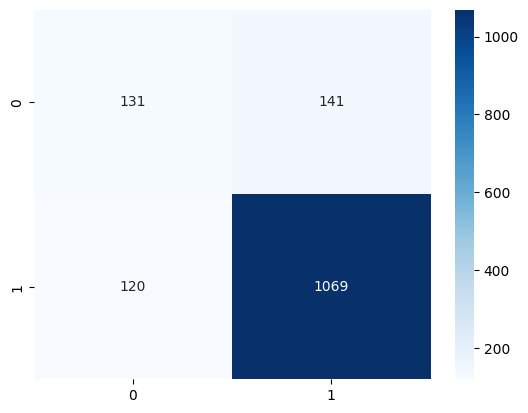

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [25]:
# 7. Make Predictions on the Test Set
y_pred_test = xgb_model.predict(test_scaled)

In [26]:
# 8. Create Submission File
submission = pd.DataFrame({
    'ID': test_ids,
    'Target': y_pred_test
})

In [27]:
submission.to_csv('final_submission.csv', index=False)
print("Submission file created!")

Submission file created!
